In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
from sklearn.model_selection import KFold
import statistics
import itertools


%matplotlib inline

In [2]:
df = pd.read_csv('./cleaned_dataset.csv')

In [3]:
df.to_csv('modified.csv', header=False, index=False)

In [4]:
df = pd.read_csv('modified.csv', header=None)

In [5]:
df = df.drop([0], axis=1)

In [21]:
class KNN():
    def __init__(self, traindata=0, trainclass=0, testdata=0, testclass=0, optimal_k=5):

        self.X_train = traindata
        self.y_train = trainclass
        self.X_test = testdata
        self.y_test = testclass
        self.precision = 0
        self.recall = 0
        self.specificity = 0
        self.y_pred = []
        self.acc = 0
        
        self.k = optimal_k
        
    # Find the min and max values for each column
    def dataset_minmax(self, dataset):
        minmax = list()
        for i in range(len(dataset[0])):
            col_values = [row[i] for row in dataset]
            value_min = min(col_values)
            value_max = max(col_values)
            minmax.append([value_min, value_max])
        return minmax

    # Rescale dataset columns to the range 0-1
    def normalize_dataset(self):
        minmax = self.dataset_minmax(self.X_train)
        for row in self.X_train:
            for i in range(len(row)):
                row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
                
        minmax = self.dataset_minmax(self.X_test)                
        for row in self.X_test:
            for i in range(len(row)):
                row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])        

        
    def compute_confusion_mat(self):
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        for i in range(len(self.y_test)):
            if(self.y_test[i]==self.y_pred):
                if(self.y_test[i]==2):
                    tp += 1
                else:
                    tn += 1
            else:
                if(self.y_test[i]==2):
                    fp += 1
                else:
                    fn += 1
        
        return [tp, fp, tn, fn]
    
    def params(self):
        l = compute_confusion_mat()
        self.precision = l[0]/(l[0]+l[1])
        self.recall = l[0]/(l[0]+l[3])
        self.specificity = (l[2]) / (l[2] + l[1])
        
        
    def accuracy(self):
        correct = 0
        for i in range(len(self.y_test)):
            if(self.y_test[i]==self.y_pred[i]):
                correct = correct + 1
        return (correct/len(self.y_test))*100
    
    def euclidean_distance(self, point1, point2):
        sum_squared_distance = 0
        for i in range(len(point1)):
            sum_squared_distance += math.pow(point1[i] - point2[i], 2)
        return math.sqrt(sum_squared_distance)  
    
    def mode(self, labels):
        return Counter(labels).most_common(1)[0][0]
    
    def knn(self, query):
        
        neighbor_distances_and_indices = []

        for index, example in enumerate(self.X_train):
            distance = self.euclidean_distance(example, query)
            neighbor_distances_and_indices.append((distance, index))

        sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)

        k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:self.k]

        k_nearest_labels = [self.y_train[i] for distance, i in k_nearest_distances_and_indices]

        return self.mode(k_nearest_labels) 
    
    def knn_classifier(self):
        self.normalize_dataset()
        for i in self.X_test:
            clf_prediction = self.knn(i)
            self.y_pred.append(clf_prediction)
            
        self.acc = self.accuracy()

        return self.acc

In [8]:
def mean(acc):
    sum = 0
    for i in acc:
        sum = sum + i
    return sum/len(acc)

In [15]:
def cross_validation_model(df, k=6):
    
    cv = []
    
    kf = KFold(6, True)
    kf.get_n_splits(df)

    X = np.array(df)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_test = X_test[:, 9:]
        X_test = X_test[:, :-1]
        y_train = X_train[:, 9:]
        X_train = X_train[:, :-1]

        X_test = X_test.tolist()
        X_train = X_train.tolist()
        y_train = y_train.tolist()
        y_test = y_test.tolist()

        y_test = list(itertools.chain.from_iterable(y_test))
        y_train = list(itertools.chain.from_iterable(y_train))
        
        knnobj = KNN(X_train, y_train, X_test, y_test, k)
        
        
        cv.append(knnobj.knn_classifier())
        
    
    return mean(cv)

In [16]:
cross_validation_model(df)

96.99872286079183

In [17]:
optimal_k = []

for k in range(1, 20):
    optimal_k.append(100 - cross_validation_model(df, k))

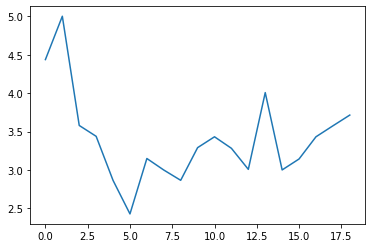

In [18]:
plt.plot(optimal_k)

In [19]:
minpos = optimal_k.index(min(optimal_k))

In [20]:
minpos

5